# Exploratory Data Analysis (EDA)

In [38]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation

%matplotlib inline

In [39]:
# Loading the Data into the Data Frame
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)

# So werden die obersten 5 Zeilen angezeigt
df.head(5)

C:\Users\Jerma\AppData\Local\Temp\ipykernel_20800\153817765.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
C:\Users\Jerma\AppData\Local\Temp\ipykernel_20800\153817765.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expec

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [40]:
# Um die untersten 5 Zeilen anzuzeigen
df.tail(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [41]:
# So prüfen man die Datentypen
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

Hier werde ich einige Zeilen löschen, die für die Daten unerheblich sind.


In [42]:
# So lässt man die irrelevanten Spalten aus.
df = df.drop(['vin'], axis=1)
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)



Manchmal können Daten doppelte Zeilen enthalten. Hier habe ich die Anzahl der doppelten Zeilen überprüft, aber es gab keine doppelten Zeilen.


In [43]:
# To find the number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


Diese Daten enthalten mehrere Nullwerte. Ich zeige die Nullwerte im Dataset an.


In [44]:
# So finden Sie die Anzahl der doppelten Zeilen
print(df.isnull().sum())     # Ermittlung der Anzahl der Nullwerte

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


Hier lasse ich die Nullwerte weg und lösche sie. Da es sich um einen sehr großen Datensatz handelt, wirkt sich das Löschen einiger Werte nicht auf die gesamten Daten aus.

In [45]:
df = df.dropna()    # Die fehlenden Werte werden gestrichen.
df.count()

year            472336
make            472336
model           472336
trim            472336
body            472336
transmission    472336
state           472336
condition       472336
odometer        472336
color           472336
interior        472336
seller          472336
mmr             472336
sellingprice    472336
saledate        472336
dtype: int64

In [46]:
print(df.isnull().sum())   # Nach dem löschen der Werte

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


Auffinden der Ausreißer in den Daten. Hier habe ich die Ausreißer in Kilometerzähler und Preis aufgezeichnet. Da die Ausreißer bei Kilometerzähler und Preis einen gewissen Einfluss auf die Daten haben, lösche ich die Ausreißer nicht. Denn der Preis eines Fahrzeugs und die gefahrene Strecke hängen von vielen anderen Faktoren ab.

<AxesSubplot:xlabel='odometer'>

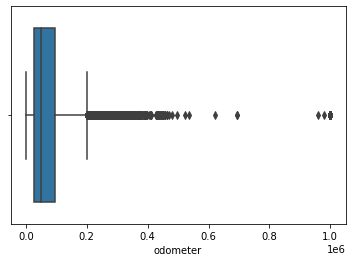

In [47]:
# Dies sind die Schritte für den Box Plot

sns.boxplot(x=df['odometer'])

<AxesSubplot:xlabel='sellingprice'>

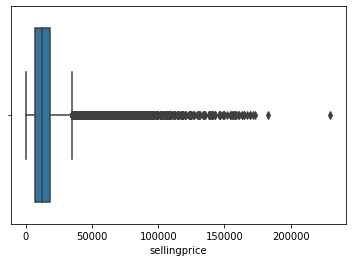

In [57]:
# Dies sind die Schritte für den Box Plot

sns.boxplot(x=df['sellingprice'])

In [49]:
# Dies sind die Schritte für den Box Plot

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                5.0
condition           1.5
odometer        68452.0
mmr             10875.0
sellingprice    11000.0
dtype: float64


Es wurde ein Diagramm mit der Anzahl der Fahrzeuge im Vergleich zu den Marken erstellt, um die wichtigsten Marken in der Auktion zu ermitteln. Dabei hatte Ford die meisten Autos.


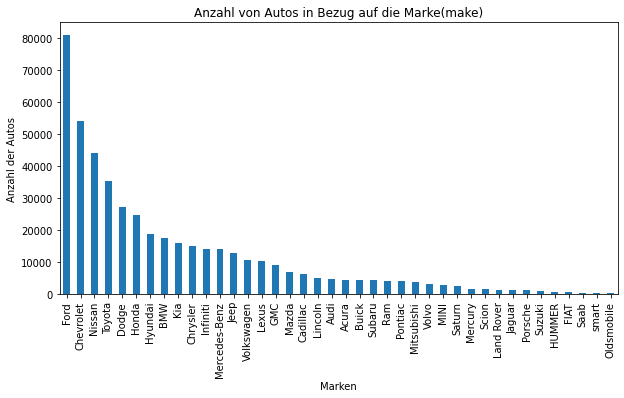

In [50]:
# Dies sind die Schritte für das Balkendiagramm

df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Anzahl von Autos in Bezug auf die Marke(make)")
plt.ylabel('Anzahl der Autos')
plt.xlabel('Marken');


# Insights finden

Hier habe ich ein Diagramm erstellt, das die Anzahl der verkauften Fahrzeuge in Abhängigkeit von ihrem Preis zeigt. Die meisten Fahrzeuge wurden in einem Bereich von 10 000 bis 20 000 verkauft.


Text(0, 0.5, 'Freq')

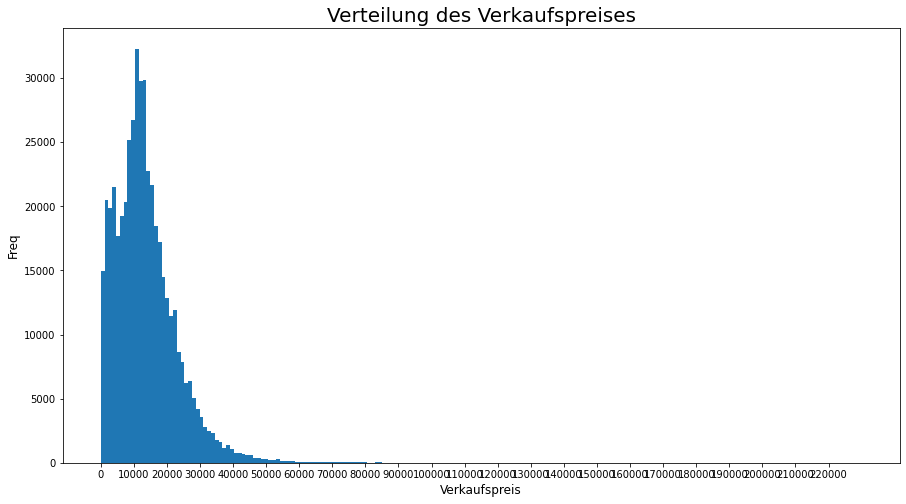

In [51]:
# These are for plotting Histogram

plt.figure(figsize=(15,8))
plt.hist(df['sellingprice'],bins=200)
plt.title('Verteilung des Verkaufspreises',fontsize=20)
plt.xticks(np.arange(0,df['sellingprice'].max(),10000))
plt.xlabel('Verkaufspreis',fontsize=12)
plt.ylabel('Freq',fontsize=12)

In [52]:
df['sellingprice'].describe()   # Beschreibung des obigen Diagramms

count    472336.000000
mean      13690.403670
std        9612.962279
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Erstellung eines Diagramms, das zeigt, wie der Kilometerstand den Verkaufspreis von Gebrauchtwagen beeinflusst. Fahrzeuge mit einem Kilometerstand von weniger als 20 Kilometern erzielen den höchsten Preis beim Verkauf. Mit zunehmender Fahrleistung sinkt der Verkaufspreis.


C:\Users\Jerma\AppData\Local\Temp\ipykernel_20800\1254645961.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);
C:\Users\Jerma\AppData\Local\Temp\ipykernel_20800\1254645961.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels);


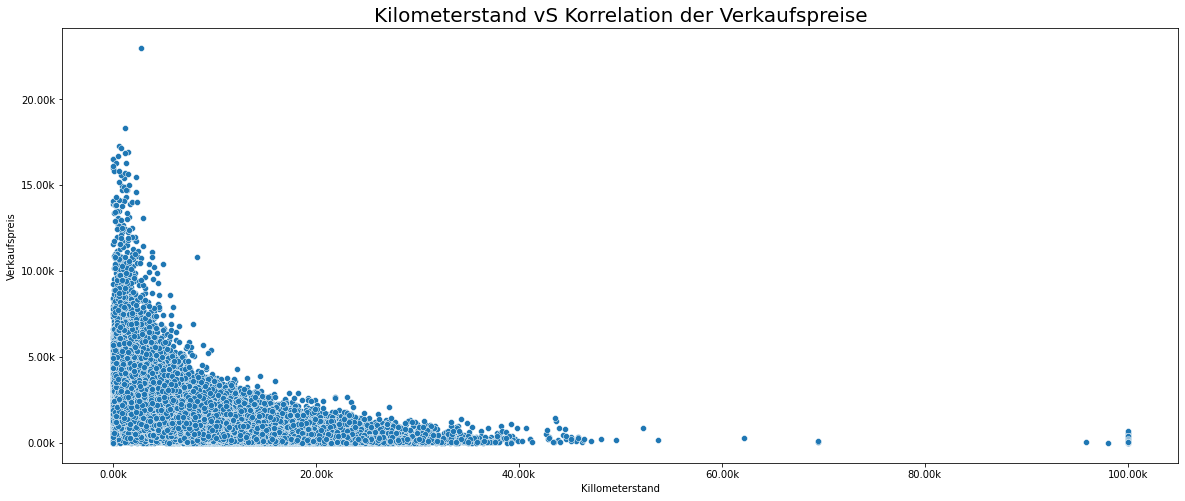

In [53]:
# Diese Parameter dienen zum Zeichnen von einem Streudiagramm

plt.figure(figsize=(20,8))
g=sns.scatterplot(x='odometer',y='sellingprice',data=df)
g.set_title('Kilometerstand vS Korrelation der Verkaufspreise',fontsize=20)
g.set_xlabel('Killometerstand',fontsize=10)
g.set_ylabel('Verkaufspreis',fontsize=10)
xlabels=['{:,.2f}'.format(x)+'k' for x in g.get_xticks()/10e3]
ylabels=['{:,.2f}'.format(y)+'k' for y in g.get_yticks()/10e3]
g.set_xticklabels(xlabels);
g.set_yticklabels(ylabels);

Text(0, 0.5, 'Gesamte Autos')

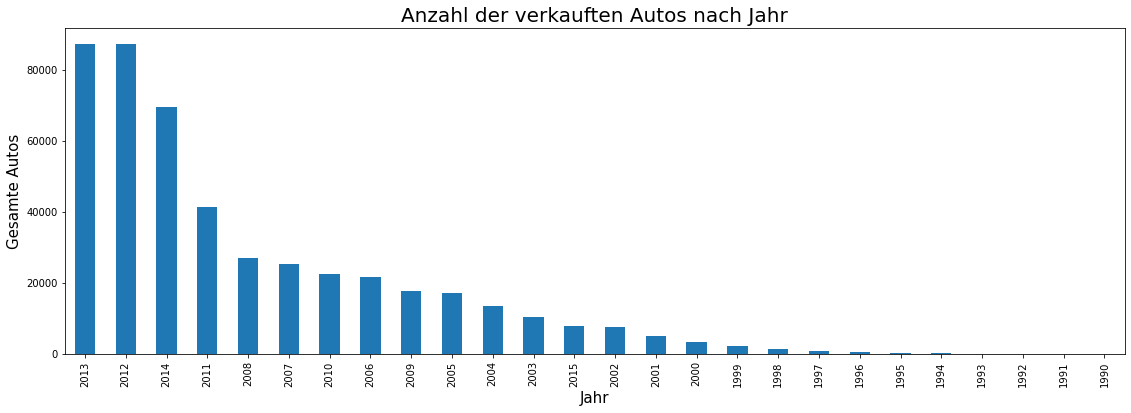

In [54]:
# Dies sind die Schritte für das Balkendiagramm

plt.figure(figsize=(19,6))

df['year'].value_counts().plot(kind='bar')

plt.title('Anzahl der verkauften Autos nach Jahr',fontsize=20)
plt.xlabel('Jahr',fontsize=15)
plt.ylabel('Gesamte Autos',fontsize=15)

Text(0, 0.5, 'Verkaufspreis')

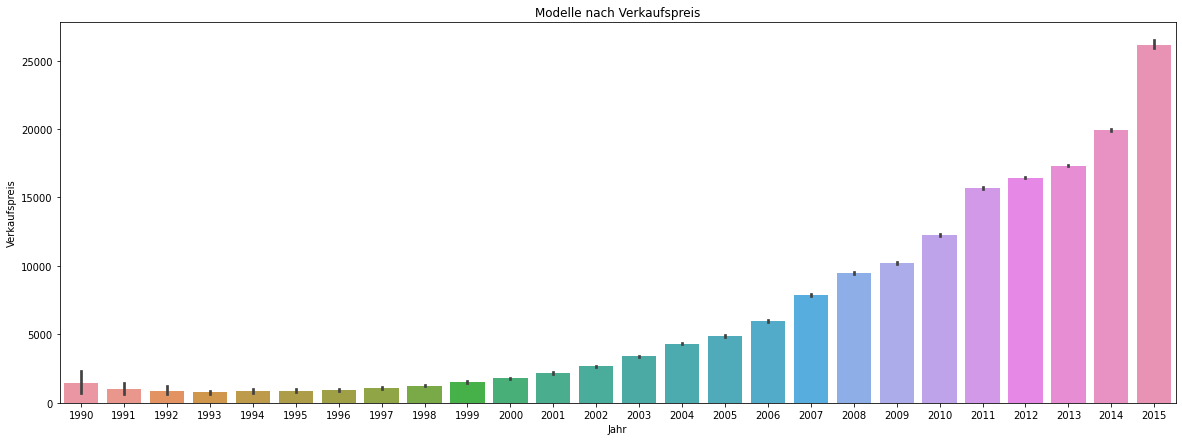

In [55]:
# Diese Parameter dienen zum Zeichnen von Balkendiagrammen

plt.figure(figsize=(20,7))
sns.barplot(x='year',y='sellingprice',data=df)
plt.title('Modelle nach Verkaufspreis')
plt.xlabel('Jahr')
plt.ylabel('Verkaufspreis')

# Schlussfolgerung

In diesem Notizbuch habe ich EDA auf dem Datensatz für Autoauktionen durchgeführt, um die Faktoren zu verstehen, die die Versteigerung von Gebrauchtwagen beeinflussen. Es handelte sich um einen großen Datensatz mit etwa 558T Zeilen. Ich habe die Nullwerte und irrelevanten Spalten gelöscht, um ein besseres Verständnis der Daten zu erhalten.

In dieser Analyse habe ich einige Diagramme erstellt, um die Verteilung des Verkaufspreises nach verschiedenen Faktoren wie Kilometerstand, Baujahr des Modells und Marken des Fahrzeugs zu zeigen.

Aus dieser Analyse konnte ich entnehmen, dass Faktoren wie Kilometerstand (die vom Fahrzeug zurückgelegte Strecke), Fahrzeugmarken und Baujahr des Modells die Versteigerung von Gebrauchtwagen hauptsächlich beeinflussen. Autos mit geringem Kilometerstand erzielen bei der Versteigerung einen guten Preis.
